In [61]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [62]:
SucroseMW = 342.3
GlucoseMW = 180.156

In [63]:
plate = pd.read_csv('2022-03-22 plate 1.txt',delimiter='\t',skiprows=2,usecols=[x for x in np.arange(2,14)]).dropna()
plate

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.5219,0.2960,0.1564,0.0946,0.0640,0.0434,0.0465,0.0467,0.0463,0.0468,0.0479,0.0497
1,0.0458,0.0458,0.0460,0.0460,0.0459,0.0457,0.0458,0.0462,0.0465,0.0460,0.0471,0.0467
2,0.0479,0.0475,0.0469,0.0488,0.0471,0.0471,0.0475,0.0475,0.0466,0.0474,0.0482,0.0474
3,0.0482,0.0480,0.0463,0.0492,0.0485,0.0474,0.0493,0.0446,0.0463,0.0554,0.0479,0.0482
4,0.0484,0.0476,0.0480,0.0481,0.0479,0.0474,0.0474,0.0414,0.0458,0.0506,0.0473,0.0478
5,0.0478,0.0476,0.0477,0.0477,0.0473,0.0474,0.0481,0.0472,0.0465,0.0524,0.0527,0.0522
6,0.0510,0.0520,0.0513,0.0522,0.0530,0.0539,0.0568,0.0571,0.0555,0.0564,0.0564,0.0555
7,0.0546,0.0553,0.0554,0.0616,0.0566,0.0569,0.0578,0.0573,0.0569,0.0570,0.0568,0.0573


In [64]:
plate = plate-plate.iloc[0,5]
plate

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.4785,0.2526,0.1130,0.0512,0.0206,0.0000,0.0031,0.0033,0.0029,0.0034,0.0045,0.0063
1,0.0024,0.0024,0.0026,0.0026,0.0025,0.0023,0.0024,0.0028,0.0031,0.0026,0.0037,0.0033
2,0.0045,0.0041,0.0035,0.0054,0.0037,0.0037,0.0041,0.0041,0.0032,0.0040,0.0048,0.0040
3,0.0048,0.0046,0.0029,0.0058,0.0051,0.0040,0.0059,0.0012,0.0029,0.0120,0.0045,0.0048
4,0.0050,0.0042,0.0046,0.0047,0.0045,0.0040,0.0040,-0.0020,0.0024,0.0072,0.0039,0.0044
5,0.0044,0.0042,0.0043,0.0043,0.0039,0.0040,0.0047,0.0038,0.0031,0.0090,0.0093,0.0088
6,0.0076,0.0086,0.0079,0.0088,0.0096,0.0105,0.0134,0.0137,0.0121,0.0130,0.0130,0.0121
7,0.0112,0.0119,0.0120,0.0182,0.0132,0.0135,0.0144,0.0139,0.0135,0.0136,0.0134,0.0139


In [65]:
def func(x,m,b):
    return m*x+b
#
def std_curve(x,n):
    temp = [x/2**i for i in range(n-1)]
    temp.append(0)
    return np.array(temp)
    
standard = std_curve(2.5,6)
popt, pcov = curve_fit(func,standard,plate.iloc[0,:6])
popt

array([ 0.19534982, -0.00505429])

0.9982631313553371

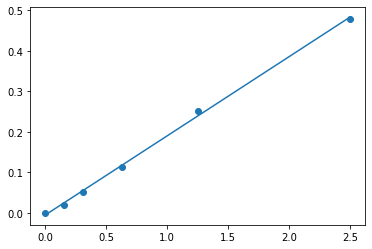

In [66]:
plt.scatter(standard,plate.iloc[0,:6])
plt.plot(standard,func(standard,*popt))
r2_score(plate.iloc[0,:6],func(standard,*popt))

In [67]:
plate=plate.apply(lambda x: (x-popt[1])/popt[0])
plate

,1,2,3,4,5,6,7,8,9,10,11,12
0,2.475325,1.318938,0.604322,0.287967,0.131325,0.025873,0.041742,0.042766,0.040718,0.043278,0.048909,0.058123
1,0.038159,0.038159,0.039182,0.039182,0.038671,0.037647,0.038159,0.040206,0.041742,0.039182,0.044813,0.042766
2,0.048909,0.046861,0.043790,0.053516,0.044813,0.044813,0.046861,0.046861,0.042254,0.046349,0.050444,0.046349
3,0.050444,0.049420,0.040718,0.055563,0.051980,0.046349,0.056075,0.032016,0.040718,0.087301,0.048909,0.050444
4,0.051468,0.047373,0.049420,0.049932,0.048909,0.046349,0.046349,0.015635,0.038159,0.062730,0.045837,0.048397
5,0.048397,0.047373,0.047885,0.047885,0.045837,0.046349,0.049932,0.045325,0.041742,0.071944,0.073480,0.070920
6,0.064778,0.069897,0.066313,0.070920,0.075016,0.079623,0.094468,0.096004,0.087813,0.092420,0.092420,0.087813
7,0.083206,0.086789,0.087301,0.119039,0.093444,0.094980,0.099587,0.097027,0.094980,0.095492,0.094468,0.097027


In [72]:
plate_mM =plate/GlucoseMW*1000
plate_mM

,1,2,3,4,5,6,7,8,9,10,11,12
0,13.739897,7.321088,3.354440,1.598431,0.728951,0.143614,0.231699,0.237382,0.226016,0.240223,0.271479,0.322625
1,0.211809,0.211809,0.217492,0.217492,0.214650,0.208967,0.211809,0.223175,0.231699,0.217492,0.248748,0.237382
2,0.271479,0.260113,0.243065,0.297052,0.248748,0.248748,0.260113,0.260113,0.234540,0.257272,0.280003,0.257272
3,0.280003,0.274321,0.226016,0.308418,0.288528,0.257272,0.311259,0.177712,0.226016,0.484587,0.271479,0.280003
4,0.285686,0.262955,0.274321,0.277162,0.271479,0.257272,0.257272,0.086786,0.211809,0.348198,0.254431,0.268638
5,0.268638,0.262955,0.265796,0.265796,0.254431,0.257272,0.277162,0.251589,0.231699,0.399344,0.407868,0.393661
6,0.359564,0.387978,0.368088,0.393661,0.416392,0.441965,0.524367,0.532891,0.487428,0.513001,0.513001,0.487428
7,0.461856,0.481746,0.484587,0.660756,0.518684,0.527209,0.552782,0.538574,0.527209,0.530050,0.524367,0.538574


In [94]:
arr = plate_mM.to_numpy().flatten()
mean = list()
std = list()
for i in range(0,len(arr),3):
    mean.append(arr[i:i+2].mean())
    std.append(arr[i:i+2].std())

In [88]:
pd.DataFrame

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       dtype=int64),)

In [76]:
plate_mM.rolling(3).mean()

,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.741062,2.597670,1.271665,0.704325,0.397450,0.200443,0.234540,0.240223,0.230752,0.238329,0.266743,0.272426
3,0.254431,0.248748,0.228858,0.274321,0.250642,0.238329,0.261061,0.220333,0.230752,0.319784,0.266743,0.258219
4,0.279056,0.265796,0.247800,0.294211,0.269585,0.254431,0.276215,0.174870,0.224122,0.363352,0.268638,0.268638
5,0.278109,0.266743,0.255378,0.283792,0.271479,0.257272,0.281898,0.172029,0.223175,0.410710,0.311259,0.314101
6,0.304629,0.304629,0.302735,0.312206,0.314101,0.318836,0.352934,0.290422,0.310312,0.420181,0.391767,0.383242
7,0.363352,0.377560,0.372824,0.440071,0.396502,0.408815,0.451437,0.441018,0.415445,0.480798,0.481746,0.473221
